In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('hearing_test.csv')

In [4]:
df.head(10)

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1
5,58.0,23.0,0
6,66.0,28.9,0
7,38.0,41.1,1
8,53.0,32.0,0
9,43.0,41.5,1


In [5]:
df.describe()

,age,physical_score,test_result
count,5000.000000,5000.000000,5000.000000
mean,51.609000,32.760260,0.600000
std,11.287001,8.169802,0.489947
min,18.000000,-0.000000,0.000000
25%,43.000000,26.700000,0.000000
50%,51.000000,35.300000,1.000000
75%,60.000000,38.900000,1.000000
max,90.000000,50.000000,1.000000


In [6]:
df['test_result'].value_counts()

1    3000
0    2000
Name: test_result, dtype: int64

<AxesSubplot:xlabel='test_result', ylabel='age'>

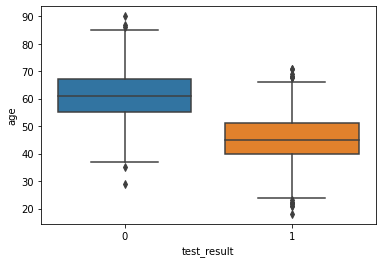

In [7]:
sns.boxplot(x='test_result',y='age',data=df)

<AxesSubplot:xlabel='test_result', ylabel='physical_score'>

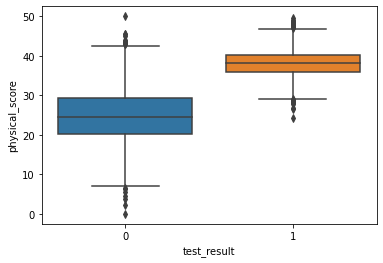

In [8]:
sns.boxplot(x='test_result',y='physical_score',data=df)

<AxesSubplot:xlabel='age', ylabel='physical_score'>

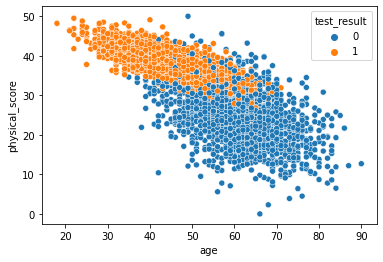

In [11]:
sns.scatterplot(x='age', y='physical_score',data=df,hue='test_result')

<AxesSubplot:>

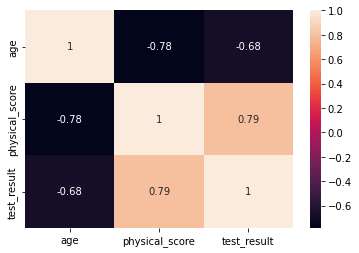

In [12]:
sns.heatmap(df.corr(), annot=True)

In [13]:
X = df.drop('test_result', axis=1)
y = df['test_result']

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.1, random_state=101)

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [22]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(scaled_X_train,y_train)

LogisticRegression()

In [24]:
y_pred = log_model.predict_proba(scaled_X_test)

In [27]:
ss=pd.DataFrame(y_pred)

In [28]:
ss

,0,1
0,0.023843,0.976157
1,0.026924,0.973076
2,0.989194,0.010806
3,0.001908,0.998092
4,0.975013,0.024987
...,...,...
495,0.044007,0.955993
496,0.186805,0.813195
497,0.980608,0.019392
498,0.994715,0.005285


In [29]:
y_pred = log_model.predict(scaled_X_test)

In [31]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [32]:
accuracy_score(y_pred, y_test)

0.93

In [33]:
confusion_matrix(y_pred,y_test)

array([[172,  14],
       [ 21, 293]], dtype=int64)

In [38]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       193
           1       0.93      0.95      0.94       307

    accuracy                           0.93       500
   macro avg       0.93      0.92      0.93       500
weighted avg       0.93      0.93      0.93       500



In [40]:
from sklearn.metrics import precision_score,recall_score
precision_score(y_pred,y_test)

0.9543973941368078

In [45]:
recall_score(y_pred, y_test)

0.9331210191082803